# 1. Classification with Naive Bayes

We will initially do a classification with Naive Bayes. We will use this later on. But this code is not needed for the course work, so the code is provided here for you. In the next part of the exercise - `Linear Regression` the code is not provided; that section will be important to know for your course work.

* Load up the data that you cleaned up last week `week1-cleaned-data.pickle`
* From this data build a vector X containg the independet variables (all columns except labels) and a vector y containing the lables
* On this data perform a PCA so that the data is reduced to 2D
* Train a Naive Bayes classifier on the resulting 2D data and the labels y
* Calculate the binary cross entropy between the predicted values of the training set and the true values on the training set. **Hint** binary cross entropy is called log_loss in scikit-learn

## 1.1 Load up the test test 

* Load up the test data from `test-data-week-2.pickle`
* As above build  a vector `x_test` that has all the columns from this except lables and `y_test` that contains the labels
* Transform this data using *the same* PCA as above *note* do **not** refit the PCA on this data
* Apply the Naive Bayes classifier that we just trained to the test data and see how well it clusters

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df_train = pd.read_pickle('../Week 10/week1-cleaned-data.pickle')
X = df_train.values[:, :9]
y = df_train.values[:, 9]

### Transform with a PCA

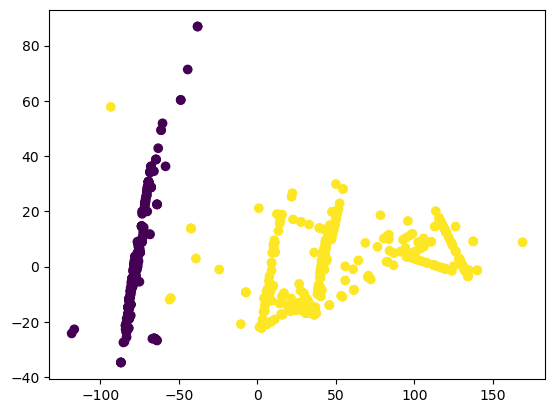

In [3]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_out = pca.fit_transform(X)
plt.scatter(pca_out[:, 0], pca_out[:, 1], c=y)

### Naive Bayes classification

In [4]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(pca_out, y)

ynew = model.predict(pca_out)

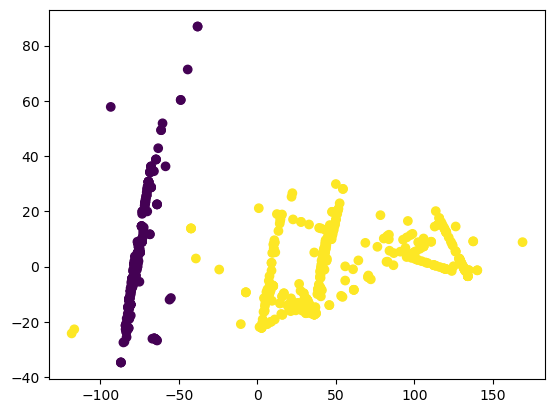

In [5]:
plt.scatter(pca_out[:, 0], pca_out[:, 1], c=ynew)

In [6]:
from sklearn.metrics import log_loss

log_loss(ynew, y)

0.23087738070433786

In [7]:
df_test = pd.read_pickle('test-data-week-2.pickle')
x_test = df_test.values[:, :9]
y_test = df_test.values[:, 9]
x_test_pca = pca.transform(x_test)

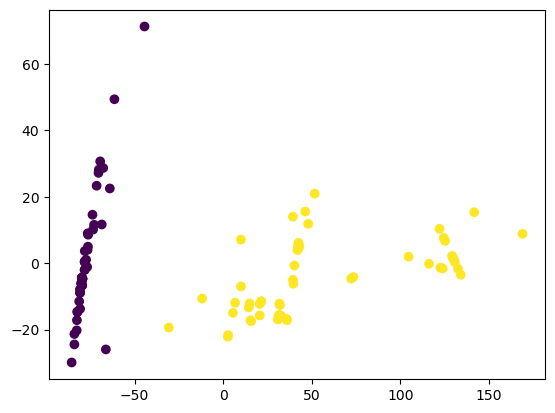

In [8]:
plt.scatter(x_test_pca[:, 0], x_test_pca[:, 1], c=y_test)

In [9]:
ynew_test = model.predict(x_test_pca)

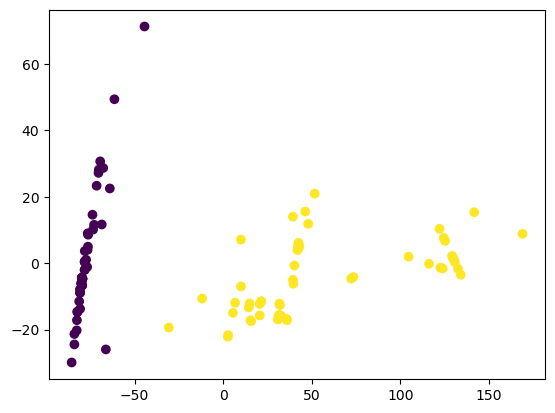

In [10]:
plt.scatter(x_test_pca[:, 0], x_test_pca[:, 1], c=ynew_test)

## 2 Linear regression

This part of the exercise will be important for the course work.


### Set up the data

* Using your classifier separate out all of the data that are ionic materials (label 0) from the training set

```
    ionic_indices = np.where(ynew==0)
    df = df_train.iloc[ionic_indices]
```    

In [11]:
ionic_indices = np.where(ynew==0)
df = df_train.iloc[ionic_indices]

In [12]:
df

,Radius mode,Radius mean,Eneg range,Eneg max,GSbandgap mode,GSbandgap range,Eneg avg_dev,Radius avg_dev,band_gap,labels
81,57.0,76.200000,2.35,3.98,1.97,1.970,0.752000,30.720000,0.8423,0.0
268,57.0,101.000000,2.36,3.98,0.00,1.970,1.180000,44.000000,3.0179,0.0
342,57.0,75.833333,2.48,3.98,1.97,1.970,0.688889,31.388889,5.1262,0.0
306,57.0,78.333333,2.35,3.98,1.97,1.970,0.812346,33.185185,0.7778,0.0
238,57.0,97.750000,3.16,3.98,1.97,1.970,1.185000,61.125000,2.1530,0.0
...,...,...,...,...,...,...,...,...,...,...
297,57.0,73.750000,2.07,3.98,1.97,1.970,0.776250,25.125000,0.9920,0.0
274,57.0,70.000000,2.41,3.98,1.97,1.970,1.071111,17.333333,7.9633,0.0
17,57.0,73.000000,2.35,3.98,1.97,1.970,0.652778,26.666667,3.3381,0.0
147,57.0,84.333333,2.43,3.98,1.97,1.970,1.080000,36.444444,2.3648,0.0


### Drop unnecessary columns

* Use pandas to drop the `labels` column from this dataset - [documentation](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop.html)

```
df.drop('labels', axis=1, inplace=True)
```

In [13]:
df.drop('labels', axis=1, inplace=True)

/tmp/ipykernel_406/334329965.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop('labels', axis=1, inplace=True)


### Look at correlations

We examine the data to see if any features are highly correlated.

Look at a map of the Pearson correlations (see code from last week's exercise). On the basis of this **remove two of the columns** that are highly correlated to other columns. 

**NB** do not remove `band_gap` that is the column that you want to fit the model for.

**NB** generally we will not remove columns unless correlation is > 0.95, but in this case you can if necessary.

Recall that the code to remove columns is:
`df_reducded = df.drop([<list of columns to drop>], axis=1)`

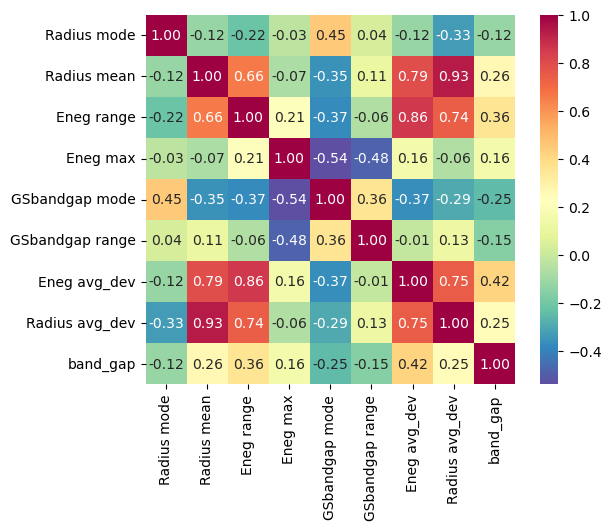

In [14]:
import seaborn as sns
corrmat = df.corr()
hm = sns.heatmap(corrmat, 
                 cbar=True, 
                 annot=True, 
                 square=True, 
                 fmt='.2f', 
                 annot_kws={'size': 10}, 
                 yticklabels=df.columns, 
                 xticklabels=df.columns, 
                 cmap="Spectral_r")
plt.show()

#### Answers
I selected to drop `Radius avg_dev` - as it is correlated to `radius mean` and `avg_dev` is less well correlated to the `band_gap`. 
`Eneg range` and `Eneg avg_dev` are also highly correlated - `Eneg range` is less well correlated to `band_gap` so I will drop this also.
Now I have 6 features for the multiple regression.

In [34]:
df_reducded = df.drop(['Eneg range', 'Radius mean'], axis=1)

### Set up x and y and save the data

x, the features for your model, are the first 6 columns (0-5)
y, the target of your mode is the final column (6)

The code to set this up and save the data is
```
x = df_reducded.values[:, :6]
y = df_reducded.values[:, 6]
df_reducded.to_pickle('week2-regression-train.pickle')

```

In [36]:
x = df_reducded.values[:, :8]
y = df_reducded.values[:, 8]
df_reducded.to_pickle('week2-regression-train.pickle')

In [37]:
df_reducded.values.shape

(306, 9)

### Scale the data 

We then standardise the data using the `StandardScaler`. **Note** if the data has only one feature, like the label data y, we need to use a reshape when standardising. The code to do this is:
```

from sklearn.preprocessing import StandardScaler

scaler_x = StandardScaler()
x = scaler_x.fit_transform(x)
scaler_y = StandardScaler()
y = scaler_y.fit_transform(y.reshape(-1, 1))
```


In [38]:
from sklearn.preprocessing import StandardScaler

scaler_x = StandardScaler()
x = scaler_x.fit_transform(x)
scaler_y = StandardScaler()
y = scaler_y.fit_transform(y.reshape(-1, 1))

### Split into train and test sets

We will use the train_test_split tool from `scikit-learn` to make an 80:20 training:test split

In [39]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0,
                                  train_size=0.8)

### Set up a linear regression and fit the model

We will use `LinearRegression` from `scikit-learn` to fit the data.
```
from sklearn.linear_model import LinearRegression
# with sklearn
regr = LinearRegression()
regr.fit(x_train, y_train)
```

We can look at the parameters of the final model:
```
print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)
```

**Question** Which of the features seems to have the greatest influence on the band gap?

In [40]:
from sklearn.linear_model import LinearRegression
# with sklearn
regr = LinearRegression()
regr.fit(x_train, y_train)

print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

Intercept: 
 [-0.01256294]
Coefficients: 
 [[-0.11829397  0.03501016  0.07880174 -0.039902    0.01694515 -0.1065415
   0.52208624 -0.27193606]]


#### Answer
I would say from this that feature number 6 has the largest influence, this is `Eneg avg dev` 

### Analyse the performance of the model

First we look at how well it predicts the training set.
Use `predictions = regr.predict(x_train)` to make predictions.

Use a scatter plot from matplotlib to plot `predictions` versus `y_train`. Don't forget to label your axes.

Text(0, 0.5, 'Predicted value')

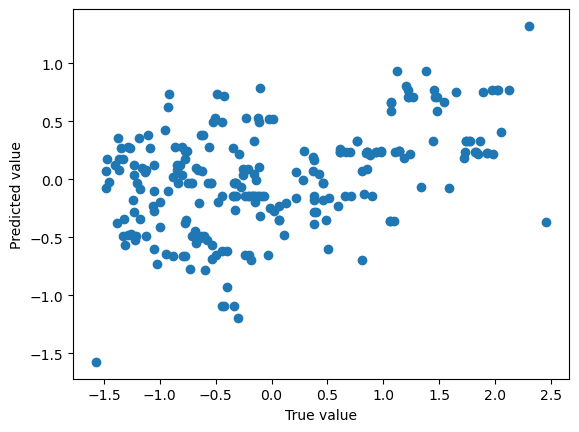

In [41]:
predictions = regr.predict(x_train)
plt.scatter(y_train, predictions)
plt.xlabel('True value')
plt.ylabel('Predicted value')

Next do the same plot for the test set

Text(0, 0.5, 'Predicted value')

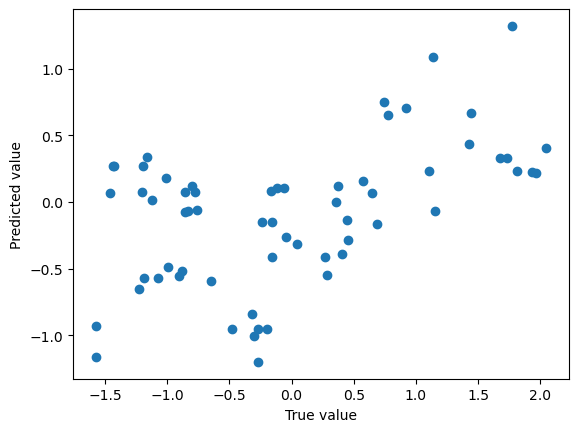

In [42]:
predictions = regr.predict(x_test)
plt.scatter(y_test, predictions)
plt.xlabel('True value')
plt.ylabel('Predicted value')

### Summary statistics

Use metrics from `scikit-learn` to look at the performace of the model

```
from sklearn.metrics import mean_squared_error, r2_score

print('Mean squared error:', mean_squared_error(predictions, y_test))
print('Root mean squared error:', mean_squared_error(predictions, y_test, squared=False))
print('r-squared:', r2_score(y_test, predictions))
```

In [43]:
from sklearn.metrics import mean_squared_error, r2_score

print('Mean squared error:', mean_squared_error(predictions, y_test))
print('Root mean squared error:', mean_squared_error(predictions, y_test, squared=False))
print('r-squared:', r2_score(y_test, predictions))

Mean squared error: 0.7985627516185062
Root mean squared error: 0.8936233835450514
r-squared: 0.24611055749407695
